### Cifar 10 Image Classificatiom
#### - 학습용 50000건(세로 32, 가로32, 컬러). 검증용 10000의 10종류(비행기, 자동차,새, 고양이,사슴,개,개구리,말,배,트럭)
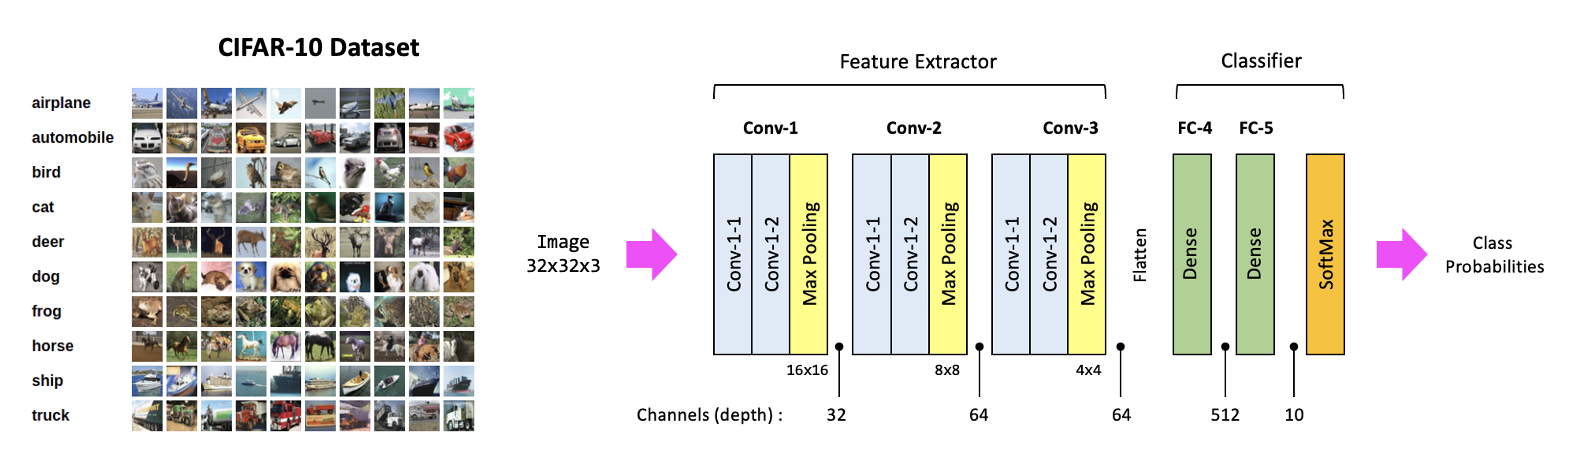

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models, utils
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

### 1. data load

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

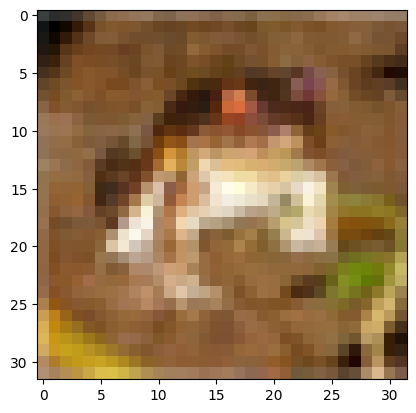

In [4]:
plt.imshow(train_images[0])
plt.show()

In [23]:
train_images[0,0,0,]

array([59, 62, 63], dtype=uint8)

In [10]:
np.array(train_images[0,:,:] / 255.0)

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

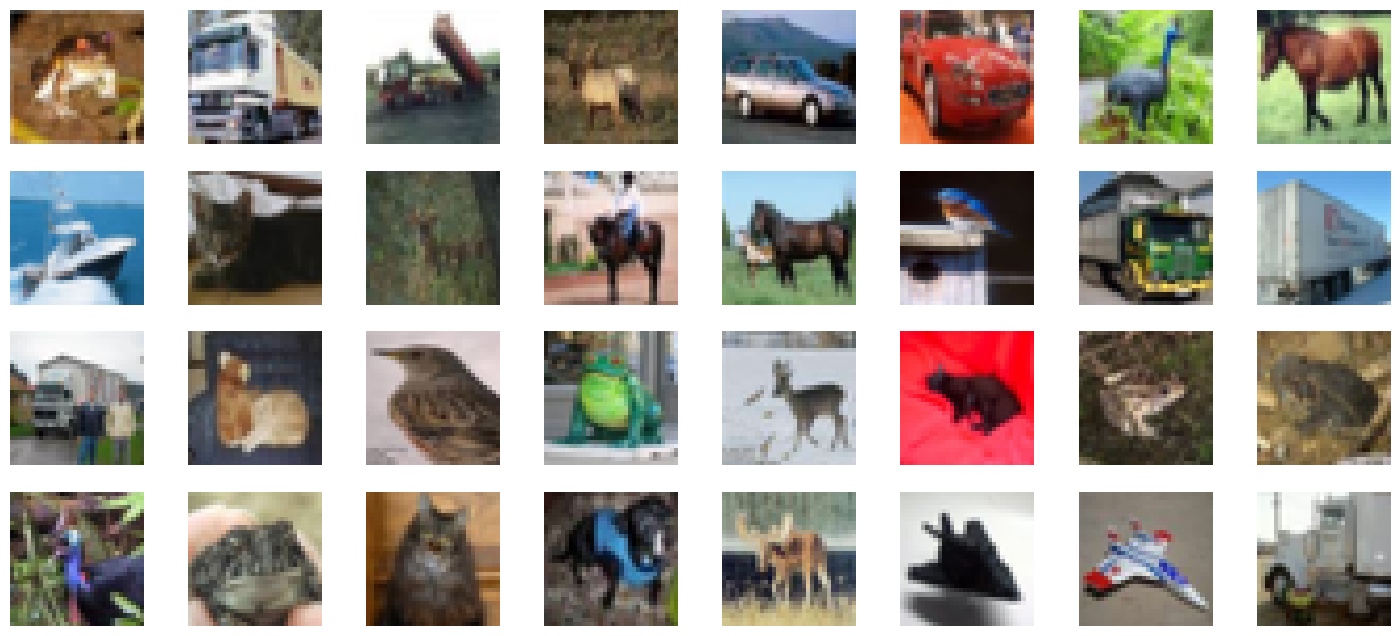

In [24]:
plt.figure(figsize=(18, 8))
for i in range(32):
    ax = plt.subplot(4, 8, i + 1)
    plt.imshow(train_images[i,:,:])
    plt.axis("off")

### 2.image scaled

In [25]:
train_images = np.array(train_images / 255.0)
test_images = np.array(test_images / 255.0)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [27]:
train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [29]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [32]:
utils.to_categorical(train_labels)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

### 3. label data one-hot encoding

In [33]:
train_labels = utils.to_categorical(train_labels)
test_labels = utils.to_categorical(test_labels)

In [34]:
train_labels.shape, test_labels.shape

((50000, 10), (10000, 10))

### 5. train/ valid data split

In [35]:
tr_image, val_image, tr_label, val_label = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [36]:
tr_image.shape, val_image.shape, tr_label.shape, val_label.shape

((40000, 32, 32, 3), (10000, 32, 32, 3), (40000, 10), (10000, 10))

### 6.Data Augmentation

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [38]:
tr_image_gen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rescale=1./255, rotation_range=0.45,
                                  zoom_range=[0.5, 1.5])
val_image_gen = ImageDataGenerator(rescale=1./255)

In [39]:
flow_tr_image_gen = tr_image_gen.flow(x=tr_image, y= tr_label, batch_size=64, shuffle=True)
flow_val_image_gen = val_image_gen.flow(x=val_image, y= val_label, batch_size=64, shuffle=False)

In [42]:
flow_tr_image_gen

### 7.Model Design

In [43]:
model = models.Sequential()
model.add(layers.Conv2D(32, 3, padding='same', activation='relu', kernel_initializer='he_normal', input_shape=(32,32,3)))
model.add(layers.Conv2D(32,3, padding='same', activation='relu', kernel_initializer='he_normal'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.25))
model.add(layers.MaxPooling2D(2))
model.add(layers.Conv2D(64, 3, padding='same', activation='relu', kernel_initializer='he_normal'))
model.add(layers.Conv2D(64, 3, padding='same', activation='relu', kernel_initializer='he_normal'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.25))
model.add(layers.MaxPooling2D(2))
model.add(layers.Conv2D(128, 3, padding='same', activation='relu', kernel_initializer='he_normal'))
model.add(layers.Conv2D(128, 3, padding='same', activation='relu', kernel_initializer='he_normal'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.25))
model.add(layers.MaxPooling2D(2))
model.add(layers.Conv2D(256, 3, padding='same', activation='relu', kernel_initializer='he_normal'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.4))
model.add(layers.Dense(256, kernel_initializer='he_normal', activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, kernel_initializer='he_normal', activation = 'relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                      

### 8. Call Back

In [48]:
t1_call = ReduceLROnPlateau(monitor='val_loss', mode='min', factor=0.1, patience=4, verbose=1)
t2_call = EarlyStopping(monitor='val_loss', mode='min', patience=7, verbose=1)

### 9. Model Compile

In [49]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])

### 10. Model Train

In [50]:
history = model.fit(flow_tr_image_gen, validation_data=flow_val_image_gen, batch_size=256, epochs=10, callbacks=[t1_call, t2_call])

Epoch 1/10
625/625 [==============================] - 134s 201ms/step - loss: 2.1356 - acc: 0.2119 - val_loss: 2.3764 - val_acc: 0.1069 - lr: 0.0010
Epoch 2/10
625/625 [==============================] - 109s 174ms/step - loss: 1.9042 - acc: 0.2979 - val_loss: 2.2945 - val_acc: 0.1157 - lr: 0.0010
Epoch 3/10
625/625 [==============================] - 108s 172ms/step - loss: 1.7989 - acc: 0.3428 - val_loss: 11.7414 - val_acc: 0.0999 - lr: 0.0010
Epoch 4/10
625/625 [==============================] - 110s 176ms/step - loss: 1.7197 - acc: 0.3753 - val_loss: 2.2588 - val_acc: 0.1370 - lr: 0.0010
Epoch 5/10
625/625 [==============================] - 108s 172ms/step - loss: 1.6509 - acc: 0.4068 - val_loss: 2.3743 - val_acc: 0.1018 - lr: 0.0010
Epoch 6/10
625/625 [==============================] - 107s 172ms/step - loss: 1.5879 - acc: 0.4320 - val_loss: 2.3409 - val_acc: 0.1138 - lr: 0.0010
Epoch 7/10
625/625 [==============================] - 109s 174ms/step - loss: 1.5224 - acc: 0.4605 - val_

### 11.Model Evaluate

In [51]:
test_image_gen = ImageDataGenerator(rescale=1./255)
flow_test_image_gen = val_image_gen.flow(x=test_images, y= test_labels, batch_size=256, shuffle=False)
model.evaluate(flow_test_image_gen)

40/40 [==============================] - 9s 132ms/step - loss: 3.3235 - acc: 0.1000


[3.3234801292419434, 0.10000000149011612]

### 12.Plot the Training Result

In [52]:
def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):
    
    fig, ax = plt.subplots(figsize=(15, 4))

    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]
        
    for idx, metric in enumerate(metrics):    
        ax.plot(metric, color=color[idx])
    
    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, 10-1])
    plt.ylim(ylim)
    # Tailor x-axis tick marks
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)   
    plt.show()
    plt.close()

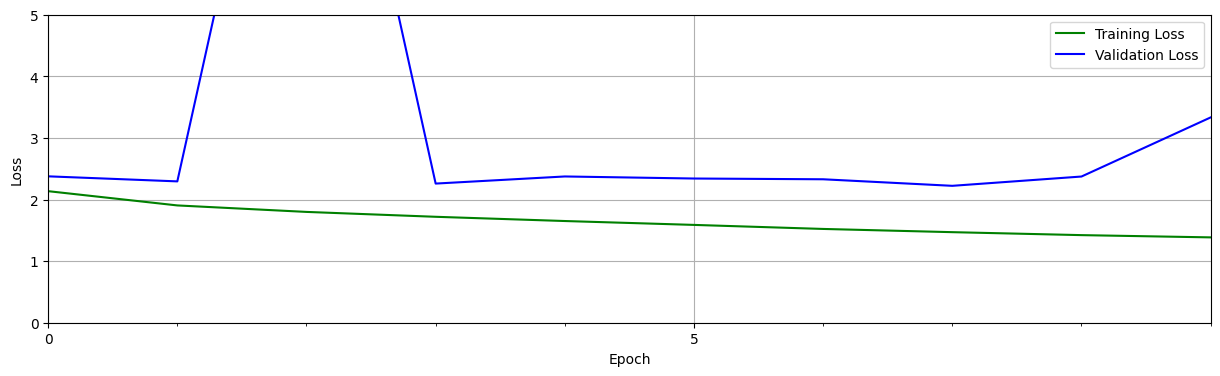

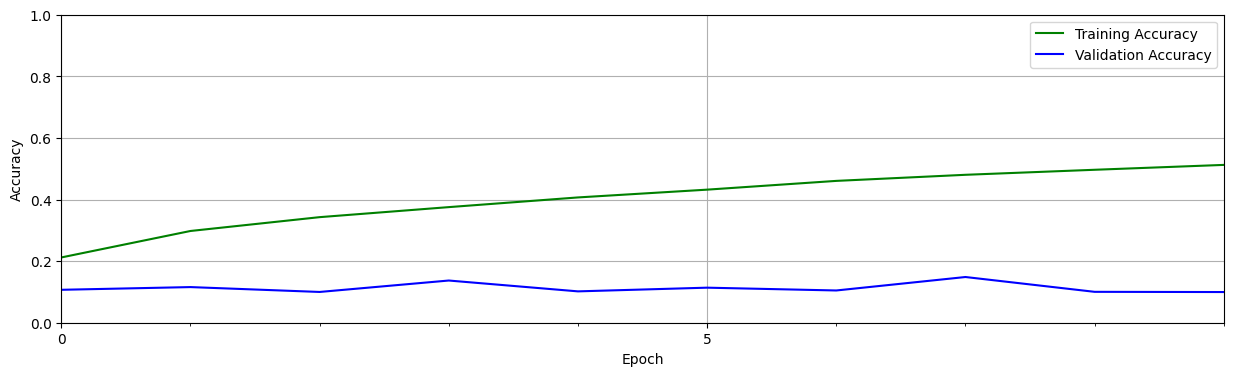

In [53]:
# Retrieve training results.
train_loss = history.history["loss"]
train_acc  = history.history["acc"]
valid_loss = history.history["val_loss"]
valid_acc  = history.history["val_acc"]
  
plot_results([ train_loss, valid_loss ],        
            ylabel="Loss", 
            ylim = [0.0, 5.0],
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);

plot_results([ train_acc, valid_acc ], 
            ylabel="Accuracy",
            ylim = [0.0, 1.0],
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])

### 13. Original Data Training

In [54]:
history = model.fit(train_images, train_labels, validation_split=0.3, batch_size=256, epochs=10, callbacks=[t1_call, t2_call])

Epoch 1/10
137/137 [==============================] - 103s 726ms/step - loss: 1.1886 - acc: 0.5798 - val_loss: 1.2893 - val_acc: 0.5755 - lr: 0.0010
Epoch 2/10
137/137 [==============================] - 80s 581ms/step - loss: 0.9820 - acc: 0.6525 - val_loss: 1.4549 - val_acc: 0.4917 - lr: 0.0010
Epoch 3/10
137/137 [==============================] - 80s 582ms/step - loss: 0.8837 - acc: 0.6905 - val_loss: 1.5974 - val_acc: 0.4197 - lr: 0.0010
Epoch 4/10
137/137 [==============================] - 85s 620ms/step - loss: 0.8048 - acc: 0.7220 - val_loss: 1.2987 - val_acc: 0.5709 - lr: 0.0010
Epoch 5/10
137/137 [==============================] - 99s 723ms/step - loss: 0.7508 - acc: 0.7413 - val_loss: 1.2256 - val_acc: 0.6321 - lr: 0.0010
Epoch 6/10
137/137 [==============================] - 80s 586ms/step - loss: 0.6881 - acc: 0.7618 - val_loss: 1.3964 - val_acc: 0.5507 - lr: 0.0010
Epoch 7/10
137/137 [==============================] - 86s 630ms/step - loss: 0.6534 - acc: 0.7748 - val_loss: 1

In [55]:
model.evaluate(test_images)

313/313 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - acc: 0.0000e+00


[0.0, 0.0]

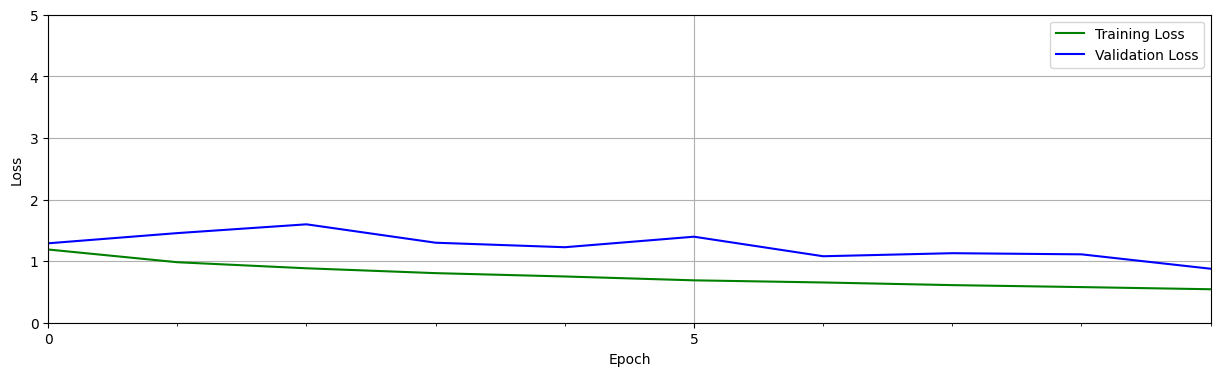

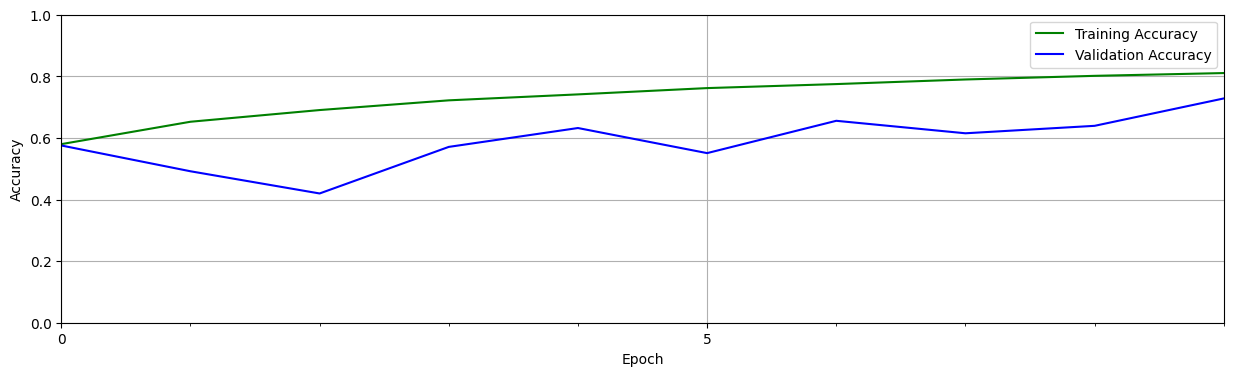

In [56]:
train_loss = history.history["loss"]
train_acc  = history.history["acc"]
valid_loss = history.history["val_loss"]
valid_acc  = history.history["val_acc"]
  
plot_results([ train_loss, valid_loss ],        
            ylabel="Loss", 
            ylim = [0.0, 5.0],
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);

plot_results([ train_acc, valid_acc ], 
            ylabel="Accuracy",
            ylim = [0.0, 1.0],
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])

### GPU사용환경 설정
#### 참고사이트 : https://meltingocean.github.io/posts/20220604_1/

In [44]:
import tensorflow as tf

In [45]:
# GPU를 사용하도록 설정
tf.config.list_physical_devices('GPU')
# physical_devices = tf.config.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [46]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1015958164957943835
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 1469431808
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4776257777211646862
 physical_device_desc: "device: 0, name: NVIDIA GeForce GT 730, pci bus id: 0000:01:00.0, compute capability: 3.5"
 xla_global_id: 416903419]

In [47]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

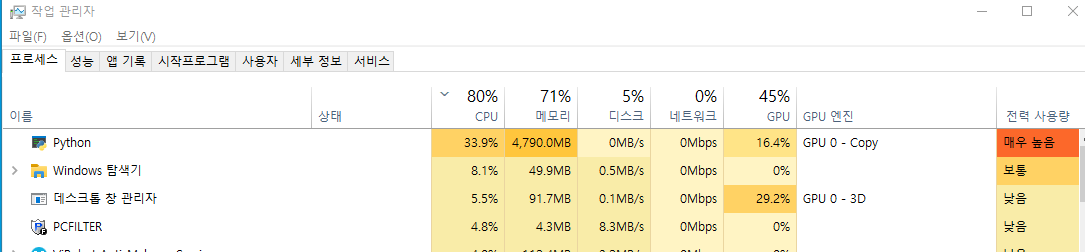